I. Introduction

1. Khái niệm cơ bản

Object Tracking là bài toán theo dõi một hoặc nhiều đối tượng chuyển động theo thời gian trong một video. Hiểu một cách đơn giản nhất, nó là bài toán ở mức độ cao hơn so với object detection, khi đối tượng được xử lí không đơn giản là một hình ảnh mà là một chuỗi các hình ảnh : video

Đương nhiên không chỉ đơn giản như vậy, việc tracking bên cạnh việc xác định các bounding box, còn quan tâm đến khá nhiều yếu tố hoặc nhiễu khác nhau:

- ID của mỗi đối tượng cần đảm bảo luôn không đổi qua các frame
- Khi đối tượng bị che khuất hoặc biến mất sau 1 vài frame, hệ thống vẫn cần đảm bảo nhận diện lại được đúng ID khi đối tượng xuất hiện
- Các vấn đề liên quan đến tốc độ xử lí để đảm bảo realtime và tính ứng dụng cao

2. Phân loại

Hiện tại có 2 cách tiếp cận chính:
- Single Object Tracking (SOT)
- Multiple Object Tracking (MOT)

Bên cạnh việc tiếp cận, các phương pháp giải lớp bài toán này cũng được phân chia rất đa dạng
- Online Tracking: Cập nhật mô hình theo thời gian thực
- Offline Tracking: Sử dụng toàn bộ video để tracking

Ngoài ra còn phân chia theo:
- Detection based Tracking: Tập trung vào mối liên kết chặt chẽ giữa object detection và object tracking, từ đó dựa vào các kết quả của detection để theo dõi đối tượng qua các frame.
- Detection Free Tracking: Coi video như 1 dạng dữ liệu dạng chuỗi, từ đó, áp dụng những phương pháp dành riêng cho "chuỗi" như RNN, LSTM, ...

3. Metrics

Về metric đánh giá, chúng ta cần quan tâm các metric sau:
- FP (False Positive) : tổng số lần xuất hiện một đối tượng được phát hiện mặc dù không có đối tượng nào tồn tại
- FN (False Negative) : tổng số lần mà đối tượng hiện có không được phát hiện.
- ID Switches : tổng số lần 1 đối tượng bị gán cho 1 ID mới trong suốt quá trình tracking video
- MOTA: Mutiple Object Tracking Accuracy:
$$ MOTA = 1 - \frac{FN + FP + ID Switches}{GT} $$

- MOTP: Mutiple Object Tracking Precision:
$$ MOTP = \frac{\sum_{i=1}^{N} \sum_{j=1}^{M} d_{ij}}{N} $$

- MT (Most Tracked Target) : tính trong ít nhất 80% video
- ML (Most Lost Target) : tính trong 20% video
- Hz (FPS): Tốc độ tracking

II. Các vấn đề đáng quan tâm trong Object Tracking

2.1 MOT

Mục tiêu của MOT là hướng tới việc phát hiện tất cả các đối tượng trong khung hình bằng việc phát hiện và gắn định danh cho chúng. Tuy nhiên, bài toán này đối mặt với nhiều thách thức như:

- Đối tượng bị che khuất (1 phần hoặc toàn bộ): Cần đảm bảo sự nhất quán khi gắn ID nhưng khi một đối tượng bị che khuất, việc này trở nên khó khăn
- Đối tượng rời khỏi phạm vị sau đó xuất hiện lại: Cần đảm bảo ID của đối tượng không thay đổi
- Các đối tượng có quỹ đạo chuyện động chồng chéo lên nhau: Cần phải xác định đúng ID của từng đối tượng

2.2 Realtime Object Tracking

Phương pháp được gọi là realtime cần đảm bảo tốc độ đưa ra output là nhanh hơn hoặc ít nhất là nhanh bằng tốc độ đưa vào input.

Trong thực tế, nếu việc xử lí từng frame chỉ khiến video có độ trễ 1s so với tốc độ bình thường của nó, việc xử lí này cũng có thể chấp nhận rằng đó là realtime. Tuy nhiên, ngay cả khi chấp nhận có độ trễ, việc đảm bảo tính realtime vẫn luôn là một vấn đề nan giải. Thông thường, chúng ta có thể bỏ qua 1 vài frame không xử lí cho đến khi frame hiện tại xử lí xong

III. SORT - Simple Online Realtime Object Tracking

Một đặc điểm của lớp các thuật toán Tracking-by-detection là tách object detection ra như một bài toán riêng biệt và cố gắng tối ưu kết quả trong bài toán này. Công việc sau đó là tìm cách liên kết các bounding box thu được ở mỗi frame và gán ID cho từng đối tượng. Do đó, chúng ta có một khung quá trình xử lí với mỗi frame mới như sau:
- Detect
- Predict
- Associate

3.1 Hungarian Algorithm

Giải thuật Hungary được phát triển và công bố vào năm 1955, đề xuất để giải bài toán phân công công việc (assignment problem).

- Kết nôi object tracking: Giả sử ta có n detection và n track predicted, Để liên kết chúng ta sử dụng một khoảng đo lường trong không gian vector. Và làm thế nào cho sự liên kết giữa track pred và detect là nhỏ nhất

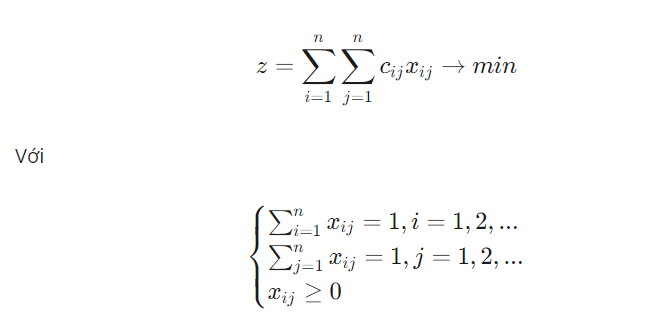

Cụ thể hơn, có thể chia thuật toán thành các bước sau:

Bước 1 (Bước chuẩn bị). Trừ các phần tử trên mỗi hàng của C cho phần tử nhỏ nhất trên hàng đó, tiếp theo trừ các phần tử trên mỗi cột cho phần tử nhỏ nhất trên cột đó. Kết quả ta nhận được ma trận C' có tính chất: trên mỗi hàng, cột có ít nhất một phần tử 0 và bài toán giao việc với ma trận C' có cùng lời giải như bài toán với ma trận C.

Bước 2: Vẽ một số tối thiểu các đường thẳng trên dòng và cột để đảm bảo mọi phần tử 0 đều được đi qua.

Bước 3: Nếu có n đường thẳng được vẽ, kết thúc thuật toán và tiến hành phân công công việc. Nếu số đường thẳng được vẽ nhỏ hơn n, vẫn chưa tìm được phương án phân công tối ưu, tiến hành bước tiếp theo.

Bước 4: Mỗi hàng (hoặc cột) có đường thẳng vẽ qua, ta gọi các hàng (cột) đó là các hàng (cột) thiết yếu. Các hàng (cột) còn lại là các hàng (cột) không thiết yếu. Tìm phần tử nhỏ nhất không nằm trong các hàng (cột) thiết yếu, tiến hành trừ mỗi hàng không thiết yếu cho phần từ nhỏ nhất ấy và cộng giá trị nhỏ nhất ấy cho cột thiết yếu. Ta được ma trận C’’ có cùng lời giải với ma trận C’. Sau đó quay lại Bước 2

3.2 Kalman Filter

Bộ lọc Kalman (Kalman Filter) là một mô hình Linear-Gaussian State Space Model, được giới thiệu lần đầu năm 1960 và ứng dụng trong rất nhiều lĩnh vực khác nhau: Xe tự lái, thực tế ảo, kinh tế lượng, tracking, điều khiển tối ưu, ...

Trong object tracking, kalman filter được biết đến nhiều nhất với vai trò dự đoán các trạng thái của đối tượng hiện tại dựa vào các track trong quá khứ và update lại các detection sau khi đã được liên kết với các track trước đó.

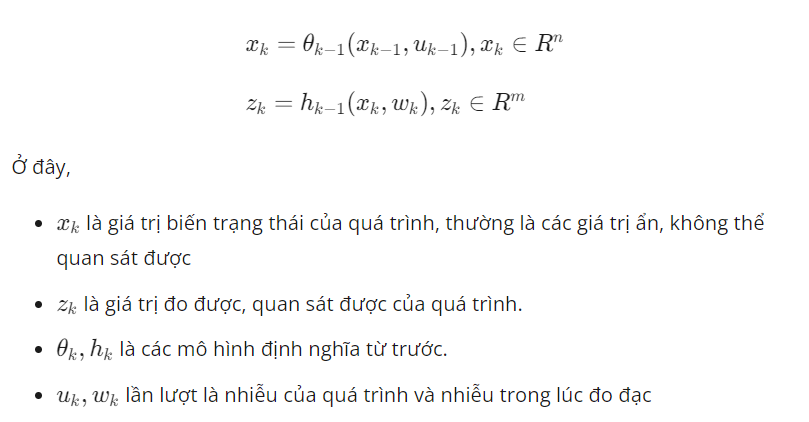

Linear Kalman Filter giả định các mô hình của quá trình đều là các mô hình tuyến tính:
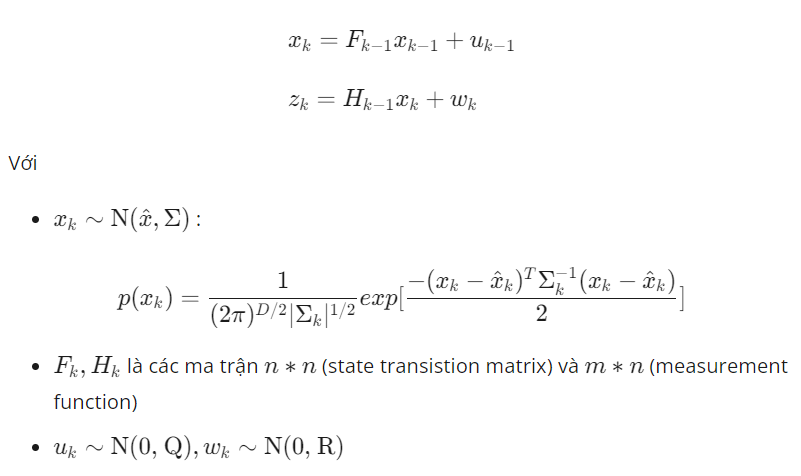

Cụ thể cách chạy:
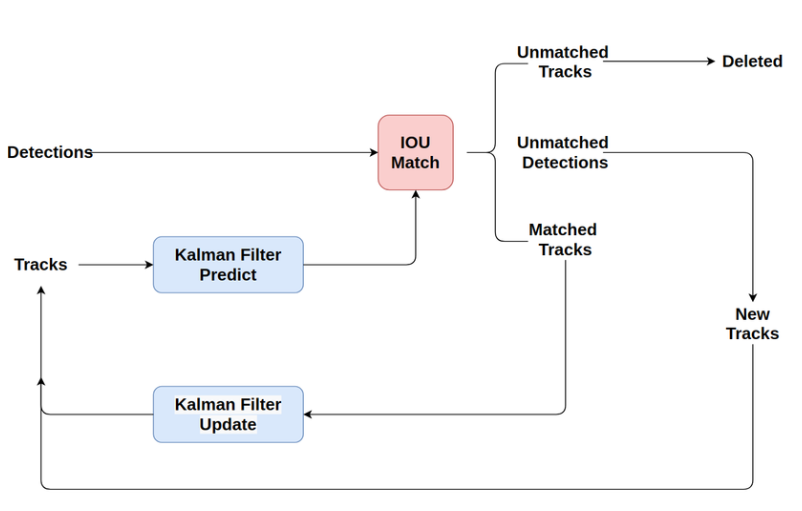